# Stochastic Gradient descent

## imports

In [13]:
#!pip install ipynb
#pip install import-ipynb
#import lab 1 practical session_ipynb
# from ipynb.fs.full.<lab> import *
#!pip install import-ipynb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import import_ipynb
from lab_1_practical_session import batch_gradient 
from lab_3_practical_session import evaluate_the_model , all_plots

## generating the data

In [2]:
x_points = np.linspace(0,20).reshape(-1 , 1)
a=-2
b=1
y_points = a*x_points + b
x_points.shape

(50, 1)

## plotting the data

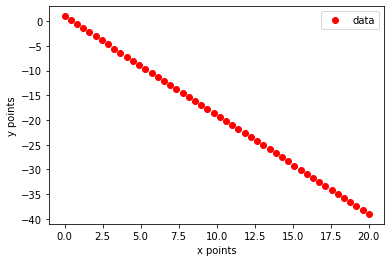

In [3]:
_ = plt.plot(x_points, y_points,'ro',label = 'data')
#_ = plt.scatter(x_points, y_points)
_ = plt.xlabel('x points')
_ = plt.ylabel('y points')
_ = plt.legend()

## Stochastic gradient function

In [4]:
def stochastic_gradient(x_points,y_points,learning_rate = 0.001, theta0 =0, theta1 =0,iterations = 1000):
    m=1
    cost_function_list=[]
    theta0_list = []
    theta1_list = []
    it = 0 #variable to compute the number of actual iterations before break
    for j in range(iterations):
        for i in range (len(x_points)):
        
            #.........................define y_prediction ,error vectors and ..........................
            y_hat = theta1*x_points + theta0
            error = y_hat - y_points

            #.......................cost_function(loss)..............................
            cost_function = (error*error)[i]/(2) # J(theta0,theta1)

            #.......................appending thetas and cost function..................
            cost_function_list.append(cost_function[0]) # cuz cost function is a ndarray contains one value
            theta0_list.append(theta0)
            theta1_list.append(theta1) #appending thetas before updating'em 

            #........................gradient ......................................
            gradient_theta0 = (error*1)[i] 
            #gradient_theta1 = sum(error*x_points)/m
            gradient_theta1 = (error*x_points)[i]/m 

            #...........................update thetas................................
            theta0 = theta0 - gradient_theta0[0]*learning_rate
            theta1 = theta1 - gradient_theta1[0]*learning_rate

            #.........................early stop condition.........................
            #u have 3 options 1.compare cost function(<0.001) or 2. compare thetas (norm of theta1 and theta2 vector) or/
            #/ 3. if gradient is really close to zero break and stop(<0.1) big number cuz it will be multiplied by alpha
        it+=1
        if it > 1:
            if abs(cost_function_list[-1] - cost_function_list[-len(x_points)]) <0.01:
        #if abs(cost_function_list[i*len(x_points)-1] - cost_function_list[i-(i-1)*(len(x_points))-1]) <0.0001:
                break


    return y_hat, theta0_list , theta1_list , cost_function_list,it

number of iterations is 38 
r2 score is 0.9999619865795315


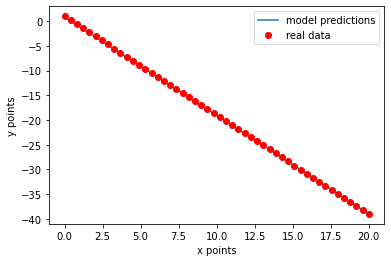

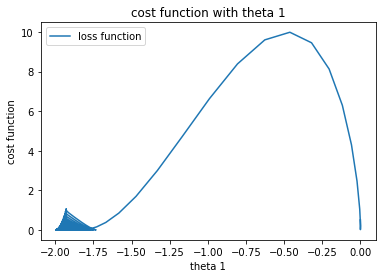

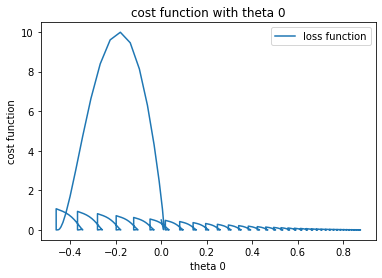

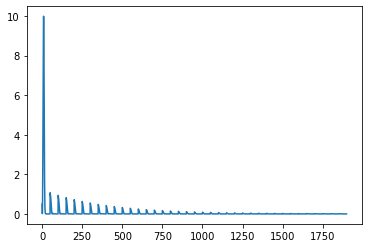

In [5]:
y_hat, theta0_list , theta1_list , cost_function_list,it = stochastic_gradient(x_points, y_points ,learning_rate = 0.01)
_ = plt.plot(x_points,y_hat,label='model predictions')
_ = plt.plot(x_points, y_points,'ro',label='real data')
_ = plt.legend()
_ = plt.xlabel('x points')
_ = plt.ylabel('y points')
print(f'number of iterations is {it} ')
r2 = r2_score(y_points,y_hat)
print(f'r2 score is {r2}')
plt.show()
_ = plt.plot(theta1_list,cost_function_list,label ='loss function')
_ = plt.title('cost function with theta 1')
_ = plt.legend()
_ = plt.xlabel('theta 1')
_ = plt.ylabel('cost function')
#theta0_list
plt.show()

_ = plt.plot(theta0_list,cost_function_list,label ='loss function')
_ = plt.title('cost function with theta 0')
_ = plt.legend()
_ = plt.xlabel('theta 0')
_ = plt.ylabel('cost function')
#theta0_list
plt.show()
theta0_list[-1]
plt.plot(cost_function_list)

## shuffle the data to make learning better

number of iterations is 1000 
r2 score is 0.9998148012011081


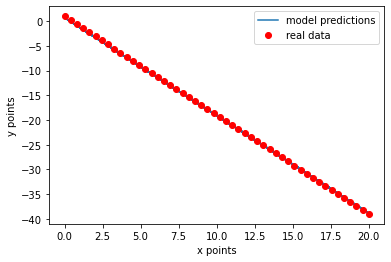

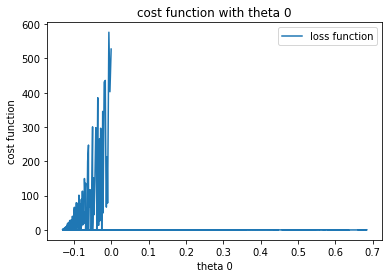

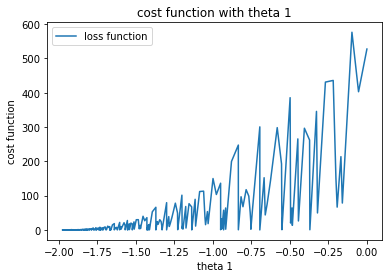

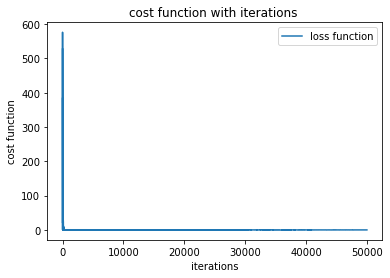

0.6841437174823949

In [6]:
def shuffle_data (x_points,y_points):
    index = np.arange(0,len(x_points))
    np.random.shuffle(index)
    x_points = x_points[index]
    y_points = y_points[index]
    return x_points , y_points
x_points_shuffled , y_points_shuffled = shuffle_data (x_points,y_points)
y_hat, theta0_list , theta1_list , cost_function_list,it = stochastic_gradient(x_points_shuffled,y_points_shuffled,learning_rate=0.0001)
_ = plt.plot(x_points_shuffled,y_hat,label='model predictions')
_ = plt.plot(x_points_shuffled, y_points_shuffled,'ro',label='real data')
_ = plt.legend()
_ = plt.xlabel('x points')
_ = plt.ylabel('y points')
print(f'number of iterations is {it} ')
r2 = r2_score(y_points_shuffled,y_hat)
print(f'r2 score is {r2}')
plt.show()
_ = plt.plot(theta0_list,cost_function_list,label ='loss function')
_ = plt.title('cost function with theta 0')
_ = plt.legend()
_ = plt.xlabel('theta 0')
_ = plt.ylabel('cost function')
#theta0_list
plt.show()


_ = plt.plot(theta1_list,cost_function_list,label ='loss function')
_ = plt.title('cost function with theta 1')
_ = plt.legend()
_ = plt.xlabel('theta 1')
_ = plt.ylabel('cost function')
#theta0_list
plt.show()

_ = plt.plot(np.arange(0,it*len(x_points)),cost_function_list,label ='loss function')
_ = plt.title('cost function with iterations ')
_ = plt.legend()
_ = plt.xlabel('iterations')
_ = plt.ylabel('cost function')
#theta0_list
plt.show()
theta0_list[-1]

# Mini Batch Gradient Decient
implementation with the full batch gradient descent

In [7]:
def mini_batch_gradient(x_points,y_points,batch_size ,learning_rate = 0.01, theta0 =0, theta1 =0,iterations = 100):
    m = len(x_points)
    cost_function_list=[]
    theta0_list_temp = [0]
    theta1_list_temp = [0]
    theta0_list = []
    theta1_list = []
    cost_fun = []
    to_break = False
    it = 0 #variable to compute the number of actual iterations before break
    
    #...................................step 1: divide the data into batches...................................
    x_batches = batch_data(x_points, batch_size)
    y_batches = batch_data(y_points, batch_size) #list not np array
    
    for i in range(iterations):
        #.................................step2: iterate over the different batches and update thetas...............
        for j in range(len(x_batches)):
            x_points_batch = x_batches[j]
            y_points_batch = y_batches[j]
            b=len(x_batches[j])            
            y_hat , theta0_list_temp , theta1_list_temp , cost_function_list,it = \
                    batch_gradient(x_points_batch,y_points_batch,learning_rate = learning_rate, theta0 =theta0_list_temp[-1] , theta1=theta1_list_temp[-1], iterations = 2)
            theta0_list.append(theta0_list_temp[-1])
            theta1_list.append(theta1_list_temp[-1])
            cost_fun.append(cost_function_list[-1])
            if j > 0:
                if abs(cost_fun[-1] - cost_fun[-2] ) < 0.01:
                    to_break = True
                    break
        if to_break :
            break
            
    y_hat = theta0_list[-1] + theta1_list[-1] * x_points
    return y_hat , theta0_list , theta1_list , cost_fun , i 

### dividing the data into batches function

In [8]:
def batch_data(x_points,batch_size=len(x_points)//5):
    lstt = []
    number_of_batches = len(x_points)//batch_size
    for i in range(1,number_of_batches+1):
        lstt.append(x_points[(i-1)*batch_size : i*batch_size])
    rem = len(x_points)%batch_size
    if rem != 0:
        lstt.append(x_points[-rem::1])
    return lstt

#same function with lambda expression
bb = 15 # number of batches
b = len(x_points)//bb
#b=4 #number of points in the batch
final_list = lambda x_points, b: [x_points[i:i+b] for i in range(0, len(x_points), b)]
x_batches = final_list(x_points, b)
y_batches = final_list(y_points, b)
len(x_batches)     

17

## mini batch before shuffling

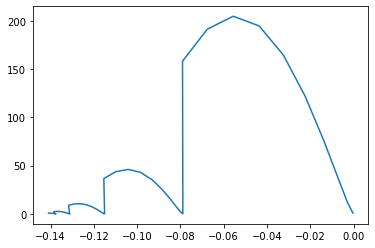

number of iterations is 4 
r2 score is 0.9961824830415958


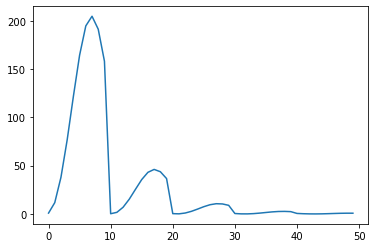

In [9]:
y_hat , theta0_list , theta1_list , cost_fun , i  = mini_batch_gradient(x_points,y_points,5 ,learning_rate = 0.00052, theta0 =0, theta1 =0,iterations = 100)
#plt.plot(cost_fun)
plt.plot(theta0_list , cost_fun )
plt.show()
plt.plot(cost_fun)
evaluate_the_model(y_hat, y_points, i)

## mini batch after shuffling

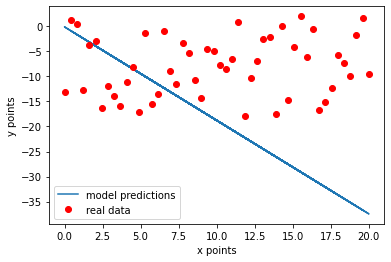

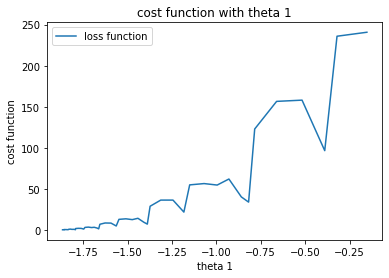

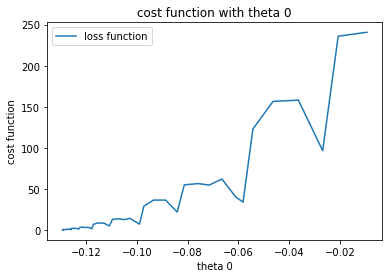

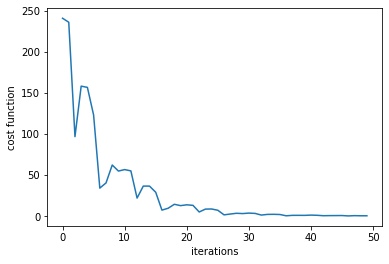

number of iterations is 4 
r2 score is 0.9951937797682002


In [10]:
x_points_shuffled , y_points_shuffled = shuffle_data(x_points, y_points)                                 
y_hat , theta0_list , theta1_list , cost_fun , i  = mini_batch_gradient(x_points_shuffled,y_points_shuffled,5 ,learning_rate = 0.00052, theta0 =0, theta1 =0,iterations = 100)
all_plots(x_points_shuffled,y_hat, theta0_list , theta1_list , cost_fun ,it)
evaluate_the_model(y_hat, y_points_shuffled, i)                        

# multivarient Gradient descent

In [11]:
def multivarien_gradient(x_matrix,y,iterations=100,learning_rate = 0.0001):
    """ this is a function to perform full batch gradient descent on 
         multi variables input (X matrix) and one column output (y vector)
         x_matrix is a numpy 2d array and y_points is either list or numpy array(prefered)"""

    y_hat_list,cost_function_list , theta_vector_list  = [],[],[]
    m = x_matrix.shape[0] # number of rows
    #........................update x matrix to include the X0 wich is a column all ones.......................
    x0 = np.ones(m).reshape(m,1) # vector of x0
    x_matrix = np.hstack([x0,x_matrix])
    m = x_matrix.shape[0] # number of rows
    n = x_matrix.shape[1] # the number of features

    #........................step 1 : initialize thetas with zeros(any assumption).................................
    theta_vector = np.zeros(n).reshape(n,1) # n not m cuz theta equals the number of features(different vars)

    for i in range(iterations):
        #........................step 2 : compute the y-predicted and error vectors....................................
        y_hat = x_matrix@theta_vector # equivilent to .dot()
        error = y_hat - y

        #........................step 3 : compute the cost function....................................
        cost_function = (error.T@error) /(2*m) # sum of error squared / 2m this is a 2d array contains one element

        #........................step 4 : compute the gradient vector..................................
        gradient_vector = (x_matrix.T @ error )/m  # this is a n*1 vector
        
        #.........................step 4.5: always append before updating..........................
        y_hat_list.append(y_hat)
        cost_function_list.append(cost_function[0,0]) #cuz cost function is a number in a 2d array
        theta_vector_list.append(theta_vector)

        #........................step 5 : update theta vector........................................
        theta_vector = theta_vector - gradient_vector * learning_rate
        
        #.........................early stop condition............................................
        if i >1:
            if abs(cost_function_list[-1] - cost_function_list[-2]) < 0.01:
                break
            if np.linalg.norm(theta_vector_list[-1] - theta_vector_list[-2]) < 0.001:
                break

    #.........................return......................................
    return y_hat , y_hat_list,cost_function_list , theta_vector_list , i # i is the number of iterations

    #gradient_vector.shape

## testing the multivariant gradient descent

accuracy r^2 : 0.9783438329637593


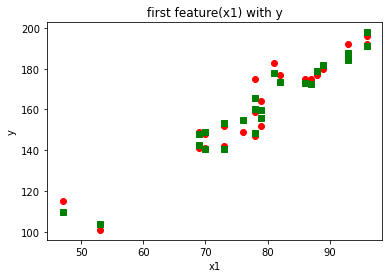

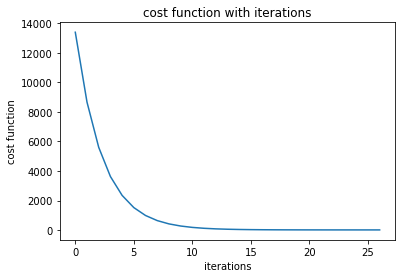

26


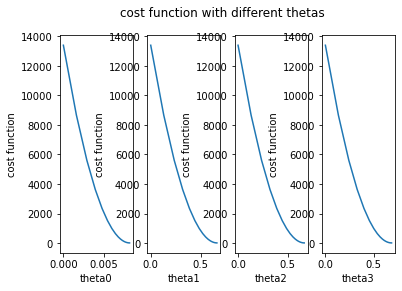

In [12]:
#.................................reading and splitting the data....................................
data = np.genfromtxt('H:\\iti AI\\career\\15 numeric oprimization\\practical session\\MultipleLR.csv'
                        ,delimiter = ',',usecols = [0,1,2,3],skip_header = 0, dtype = 'float64')
x_matrix = data[:,:-1]
y = data[:,-1].reshape(-1,1)

#......................................hyper parameters and calling the function.......................
iterations = 100
learning_rate = 0.00001
y_hat,y_hat_list, cost_function_list , theta_vector_list , it =\
multivarien_gradient(x_matrix = x_matrix , y = y , iterations = iterations , learning_rate = learning_rate)
print(f'accuracy r^2 : {r2_score(y,y_hat)}')

#....................................performing plots to better visualization............................
x1 = x_matrix[:,0]
_ = plt.plot(x1,y,'ro')
_ = plt.plot(x1,y_hat,'gs')
_ = plt.title('first feature(x1) with y')
_ = plt.xlabel('x1')
_ = plt.ylabel('y')
plt.show()

#plotting the cost function with iterations
_ = plt.plot(cost_function_list)
_ = plt.title('cost function with iterations')
_ = plt.xlabel('iterations')
_ = plt.ylabel('cost function')
plt.show()

#plotting the cost function with thetas
theta_vector_list_np = np.array(theta_vector_list)
n = x_matrix.shape[1]+1 # +1 cuz the theta0 (intercept)
fig , axes = plt.subplots(1,n)
plt.suptitle('cost function with different thetas')
for i in range(n):#theta_vector_list_np.shape[1]
    axes[i].plot(theta_vector_list_np[:,i],cost_function_list) # note that when learning rate  = 0.0001 overshoot exists
    #when learning_rate = 0.00001 no overshoot in theta values
    axes[i].set(xlabel = f'theta{i}' , ylabel = 'cost function')
print(it)